# <b style='color:darkblue'>Spark Internship</b> <br>
## Task 6 <br>
### Prediction Using Supervised ML
#### Decision Tree Algorithm with Python

<b> Objective : </b> In this Decision Tree task we will predict different classes of flower  based upon the Length and Width of Sepal and Petal. Decision tree classifier is used to classify three category of flower. 

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report

<b>Features Explanation :</b><br>
ID : ID of sample.<br>
SepalLengthCm : Sepal Length in centimeter. <br>
SepalWidthCm : Sepal Width in centimeter. <br>
PetalLengthCm : Petal Length in centimeter. <br>
PetalWidthCm : Petal Width in centimeter. <br>
Species : Species of sample fmlower. <br>

In [2]:
# Load dataset with first five observation.
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# dataset has 150 observations and 6 columns
iris.shape

(150, 6)

In [4]:
# Dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# remove unnecessary column
iris = iris.drop('Id',axis=1)

In [6]:
# check for missing values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The dataset has no null values.

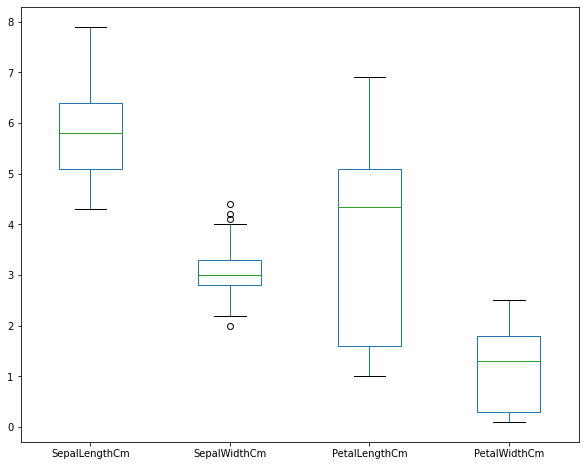

In [7]:
# Check for Outliers by box plot
plt.rcParams["figure.figsize"] = (10,8)
iris.plot(kind='box')
plt.show()

Only sepal has outliers.

In [8]:
# Remove outliers with IQR method because clusters are sensitive to outliers.
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)

IQR = Q3-Q1

iris = iris[~((iris<(Q1-1.5*IQR)) | (iris>(Q3+1.5*IQR))).any(axis=1)]

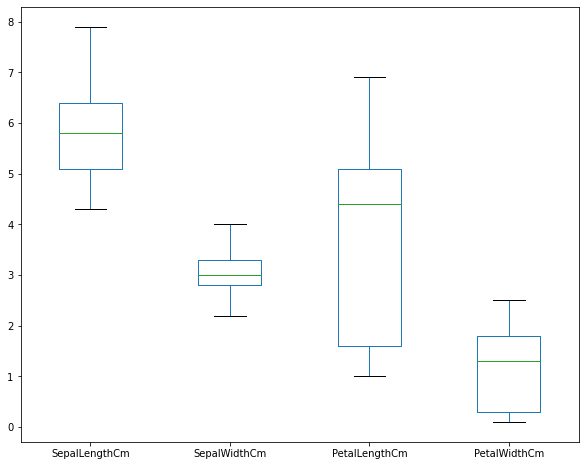

In [9]:
# Check for Outliers by box plot
plt.rcParams["figure.figsize"] = (10,8)
iris.plot(kind='box')
plt.show()

Now, Dataset has no outliers.

In [10]:
# let's remove categorical column which is unnecessary for making clusters
X = iris.drop('Species',axis=1)


In [11]:
# Categories of flowers
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

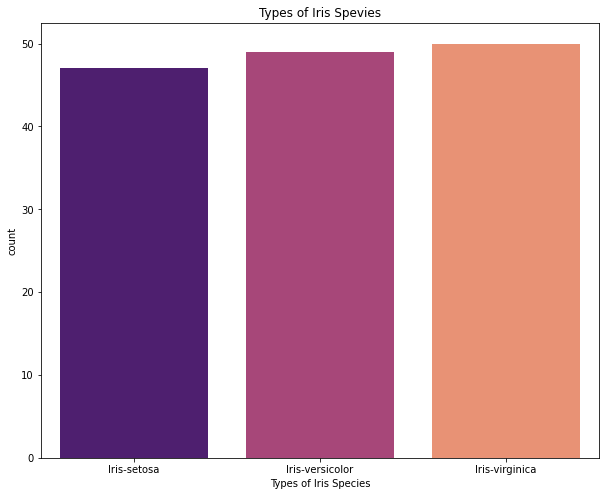

In [17]:
# value count of every class through countplot 
sns.countplot(iris['Species'],palette='magma')
plt.xlabel('Types of Iris Species')
plt.title('Types of Iris Spevies')
plt.show()

In [18]:
# Labeling flower species
y = iris['Species'].replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(0,1,2))

In [19]:
# check whether target variable is labeled or not.
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 146, dtype: int64

In [20]:
# splitting dataset into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [21]:
# Let's build classification model
dt = DecisionTreeClassifier()

In [22]:
dt_model = dt.fit(X_train,y_train)
print('Decision tree model is created')

Decision tree model is created


In [23]:
# Predict y
y_pred = dt_model.predict(X_test)

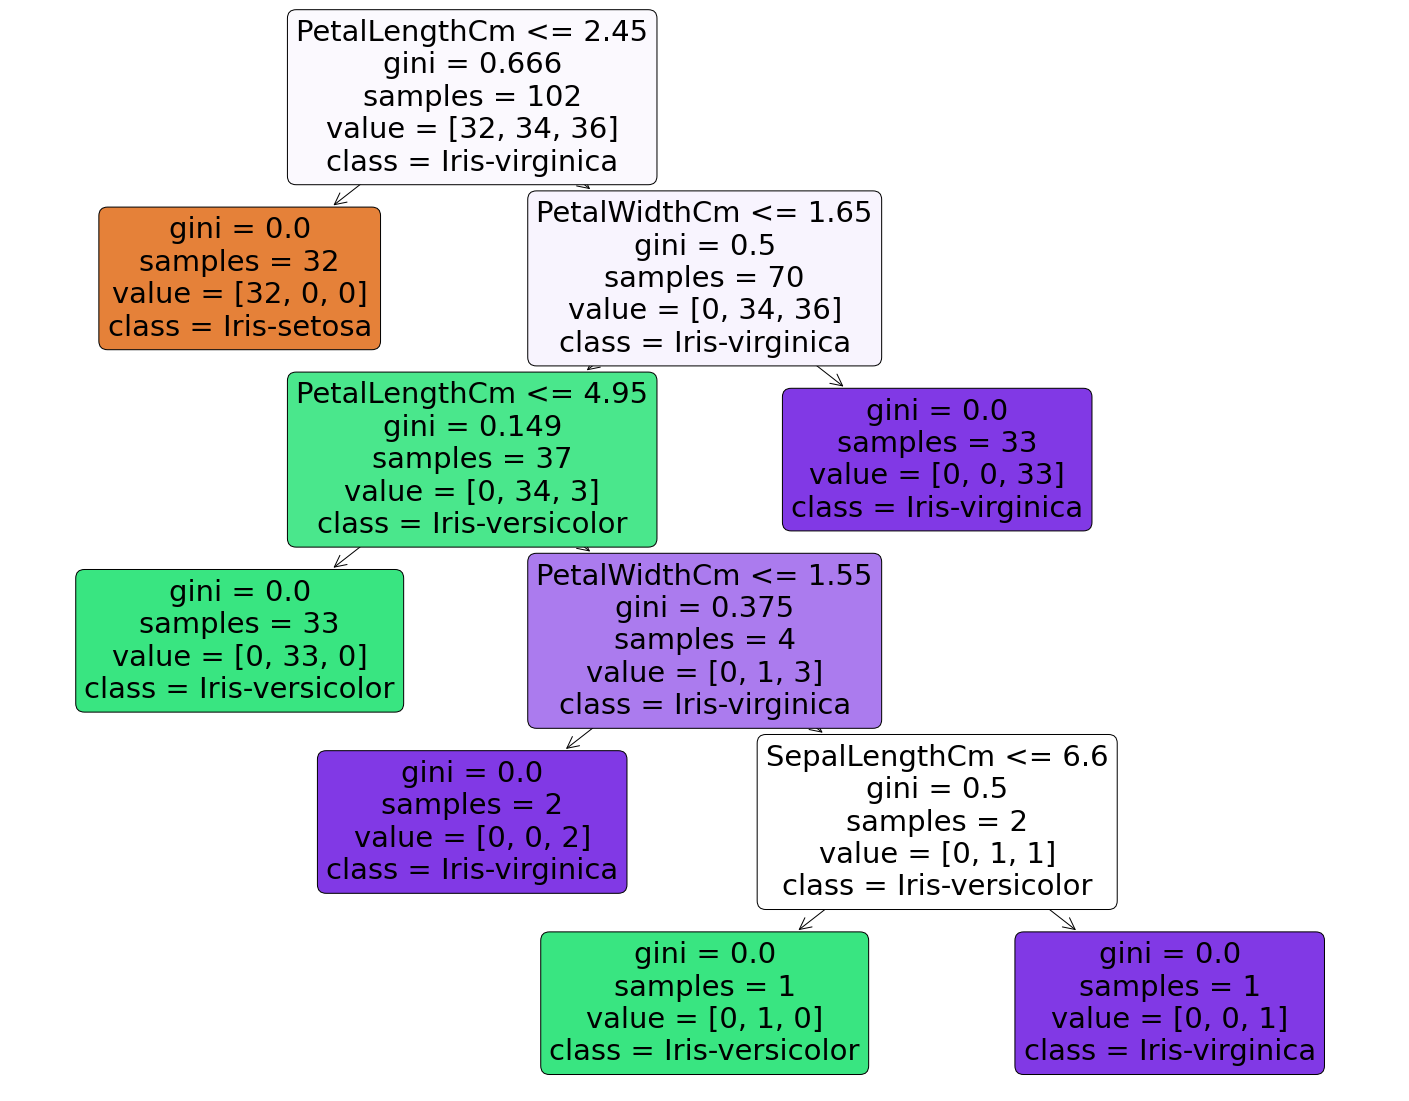

In [24]:
# visualizing Decision Tree
plt.figure(figsize=(25,20))
tree.plot_tree(dt,
               feature_names = dt_model.feature_names_in_, 
               class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               rounded=True, 
               filled = True);

In [25]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 14]], dtype=int64)

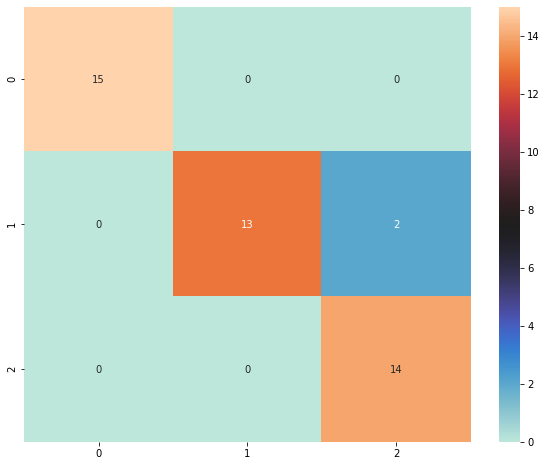

In [27]:
# Visualizing the confusion matrix with the help of heatmap
sns.heatmap(cm,annot=True,cmap='icefire')
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44



We can feed any new data to this model and it would be able to predict the right class accordingly with 93% accuracy.